In [6]:
!pip install --upgrade leap_ie --quiet

from leap_ie.vision import engine
from leap_ie.vision.models import get_model

In [9]:
config = {"leap_api_key": "YOUR_LEAP_API_KEY"}

Getting model torchvision.resnet18
Pytorch mode enabled.
Found device: cuda
Generating class prototypes...
Using device cuda


100%|██████████| 1000/1000 [00:35<00:00, 28.46it/s]


Waiting for logging to complete...
Finishing...


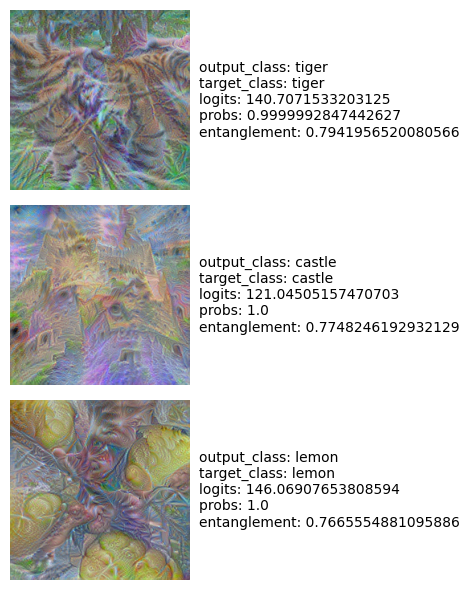

In [3]:

# Replace this model with your own, or explore any imagenet classifier from torchvision (https://pytorch.org/vision/main/models.html#classification).
preprocessing_fn, model, class_list = get_model('resnet18', source='torchvision')

# indexes of classes to generate prototypes for.
target_classes = [292, 483, 951]

# generate prototypes
results_df, results_dict = engine.generate(project_name="resnet18", model=model, class_list=class_list, config=config,
                             target_classes=target_classes, preprocessing=preprocessing_fn)


# Head to https://app.leap-labs.com/ to explore your prototypes!
engine.display_df(results_df)


Pytorch mode enabled.
Found device: cuda
Generating class prototypes...
Using device cuda


100%|██████████| 1000/1000 [00:11<00:00, 84.86it/s]


Isolating salient features...
Isolating features for: ['lemon', 'orange', 'jackfruit']
Using device cuda


100%|██████████| 1000/1000 [00:45<00:00, 21.80it/s]


Waiting for logging to complete...
Finishing...


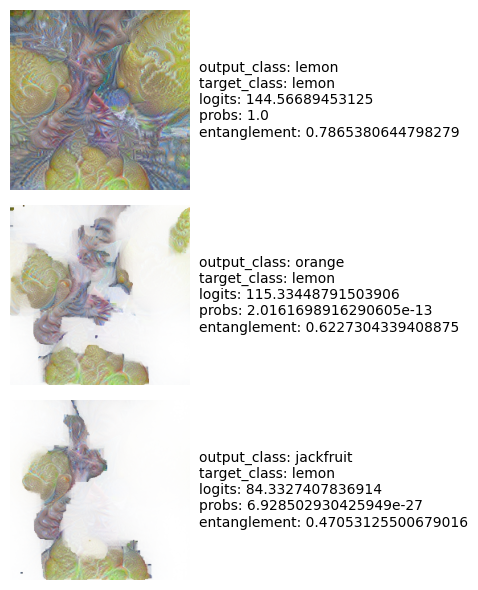

In [10]:

#Let's turn on isolation, to see which features are most important.
config["isolation"] = True

# indexes of classes to generate prototypes for.
target_classes = [951]

# generate prototypes
results_df, results_dict = engine.generate(project_name="resnet18", model=model, class_list=class_list, config=config,
                             target_classes=target_classes, preprocessing=preprocessing_fn)

#Head to https://app.leap-labs.com/ to explore your prototypes and feature isolations!
engine.display_df(results_df)

Getting model torchvision.resnet101
Pytorch mode enabled.
Found device: cuda
Isolating salient features...
Samples found...
Isolating features for: ['pineapple', 'orange', 'banana']
Using device cuda


100%|██████████| 1000/1000 [02:05<00:00,  8.00it/s]


Waiting for logging to complete...
Finishing...


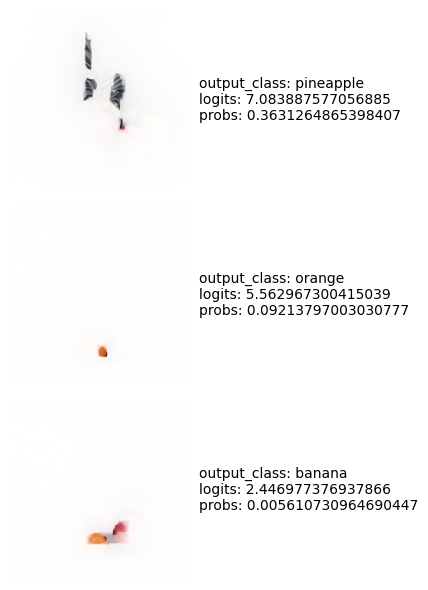

In [12]:
from PIL import Image
import requests
from io import BytesIO
from torchvision import transforms
import torch

#Include your WandB entity and api key, and we'll log to your project dashboard.

config = {"leap_api_key": "YOUR_LEAP_API_KEY",
          "wandb_entity": "YOUR_WANDB_ENTITY",
          "wandb_api_key": "YOUR_WANDB_API_KEY"}

preprocessing_fn, model, class_list = get_model('resnet101', source='torchvision')

def load_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')

    preprocess = transforms.Compose([
        transforms.Resize(224, interpolation=Image.BICUBIC),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ])
    input_tensor = preprocess(img)
    input_batch = input_tensor.unsqueeze(0)

    return input_batch

# Let's do feature isolation on a natural image
url = "https://limitedabode.co.uk/cdn/shop/products/fruit-bowl-min_1800x1800.jpg?v=1643205800"
input_tensor = load_image(url)

# Note that project_name should be the WandB project you want to send results to.
results_df, results_dict = engine.generate(project_name="resnet101", model=model, class_list=class_list, config=config, preprocessing=preprocessing_fn, samples=input_tensor)

#Head to https://app.leap-labs.com/ to explore your prototypes and feature isolations!
engine.display_df(results_df)